<a href="https://colab.research.google.com/github/gharbiaziz10/ACP_Mini_Project/blob/main/ACP_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning : Analyse en Composants Principales (ACP)

**Etudier la performance du groupe pétrolier entre les années 1969 et 1984**

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("Mini_Projet_ACP.xlsx")
x = data.drop('Annee', axis=1)

In [3]:
features = x.columns
features

Index(['NET', 'INT', 'SUB', 'LMT', 'DCT', 'IMM', 'EXP', 'VRD'], dtype='object')

In [4]:
data.head()

,Annee,NET,INT,SUB,LMT,DCT,IMM,EXP,VRD
0,1969,17.93,3.96,0.88,7.38,19.86,25.45,5.34,19.21
1,1970,16.21,3.93,0.94,9.82,19.11,26.58,5.01,18.40
2,1971,19.01,3.56,1.91,9.43,17.87,25.94,5.40,16.88
3,1972,18.05,3.33,1.73,9.72,18.83,26.05,5.08,17.21
4,1973,16.56,3.10,2.14,9.39,20.36,23.95,6.19,18.31


In [5]:
data.shape

(16, 9)

In [6]:

data.describe()

,Annee,NET,INT,SUB,LMT,DCT,IMM,EXP,VRD
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,1976.500000,13.853750,3.135000,2.304375,8.874375,22.366875,21.979375,10.323125,17.165000
std,4.760952,2.902346,0.531451,0.844914,1.729003,2.369444,3.153511,3.849233,1.153961
min,1969.000000,9.460000,2.330000,0.880000,6.760000,17.870000,17.610000,5.010000,15.490000
25%,1972.750000,12.380000,2.715000,1.880000,7.307500,20.235000,19.402500,5.992500,16.275000
50%,1976.500000,13.230000,3.075000,2.270000,8.745000,23.280000,22.260000,11.240000,17.090000
75%,1980.250000,16.297500,3.570000,2.482500,10.045000,24.025000,24.490000,12.150000,17.980000
max,1984.000000,19.010000,3.960000,4.000000,11.810000,25.050000,26.580000,16.670000,19.210000


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Normaliser les donnees
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)
# Appliquer la methode PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [9]:
#Afficher le cercle de correlation
def plot_corr_circlre(pca,features,components=(0,1)):
  pcs=pca.components_
  plt.figure(figsize=(6,6))
  for i, feature in enumerate(features):
    plt.arrow(0,0,pcs[components[0],i],pcs[components[1],i],
    head_width=0.05, head_length=0.05)
    plt.text(pcs[components[0],i]*1.2,pcs[components[1],i]*1.2, feature, color='black' )

  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel(f"PC{components[0]+1}")
  plt.ylabel(f"PC{components[1]+1}")
  plt.grid()
  plt.gca().add_artist(plt.Circle((0,0),1,color='b',fill=False,linestyle='--'))

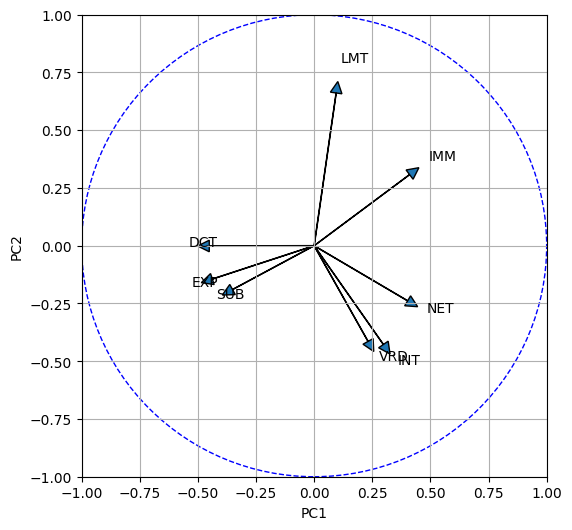

In [10]:
plot_corr_circlre(pca,features)

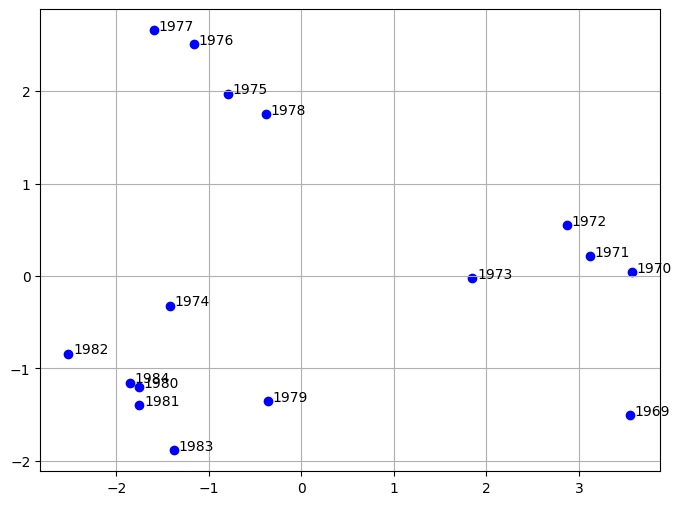

In [11]:
#Traçage du plan factoriel
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c='blue')
for i,year in enumerate(data['Annee']):
    plt.text(data_pca[i,0]+0.05,data_pca[i,1],str(year),fontsize=10)
plt.grid()